[info] Parsing spec ...
[info] Parsing succeeded
[info] Building synthesizer ...


# run synthesize 001.json


[info] Synthesizing programs ...
[info] Solution found: select(@param0, ['2', '3'])
[info] Parsing spec ...
[info] Parsing succeeded
[info] Building synthesizer ...
[info] Synthesizing programs ...
[info] Solution found: select(@param0, ['1', '3'])


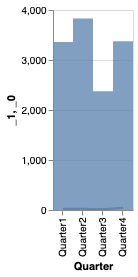

In [5]:
import rpy2.ipython
import warnings
warnings.filterwarnings('ignore')

%reload_ext rpy2.ipython
%reload_ext autoreload

import json
import pandas as pd
import os
from vega import VegaLite
from ipywidgets import widgets

from falx.chart import *
from interface import Falx

DATA_DIR = os.path.join("..", "benchmarks")

def render_ggplot2(vis):
    """Given a visualization (VisDesign object), 
        render it using ggplot"""
    ggplot_script = vis.to_ggplot2()
    for l in ggplot_script:
        %R -i l
        %R eval(parse(text=l))
    %R print(p)

def render_vegalite(vis):
    # Render a visualization using vegalite
    VegaLite(vis.to_vl_obj()).display()
    
def try_example(fname):

    with open(os.path.join(DATA_DIR, fname), "r") as f:
        data = json.load(f)

    print("# run synthesize {}".format(fname))

    input_data = table_utils.load_and_clean_table(data["input_data"])
    vis = VisDesign.load_from_vegalite(data["vl_spec"], data["output_data"])
    
    trace = vis.eval()
    candidates = Falx.synthesize(inputs=[input_data], vtrace=trace)
    
    for pt, pv in candidates:
        render_vegalite(pv)
        #render_ggplot2(pv)
    
try_example('001.json')